In [8]:
import pandas as pd
# load the source data for each panel 
panel_b = pd.read_excel('./fig4_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_b',index_col=0)
panel_c = pd.read_excel('./fig4_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_c',index_col=0)
panel_e = pd.read_excel('./fig4_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_e',index_col=0)
panel_f = pd.read_excel('./fig4_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_f',index_col=0)

/tmp/ipykernel_1570783/3211749527.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(fracs,panel_b['spapretrain'],'r',color=colors[3],label='Spanish pretrain')
/tmp/ipykernel_1570783/3211749527.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(fracs,panel_c['spapretrain'],'r',color=colors[3])
/tmp/ipykernel_1570783/3211749527.py:123: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.stripplot([panel_e.best_mcd.values,panel_e.worst_mcd.values],palette=pal,ax=ax,clip_on=False)
/tmp/ipykernel_1570783/3211749527.py:124: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot([panel_e.best_mcd.values,panel_e.worst_mcd.va

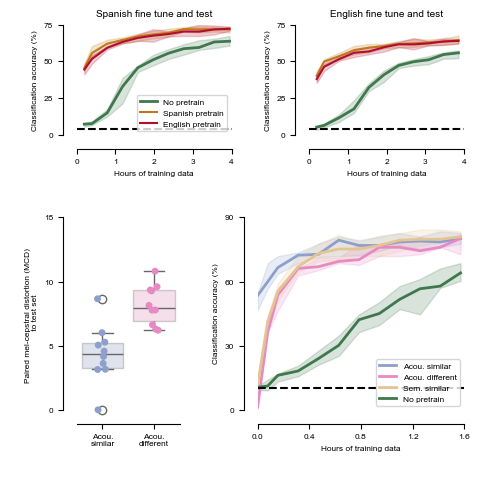

In [9]:
# Computes and plots the dendrogram
import seaborn as sns
import matplotlib.font_manager
import matplotlib as mpl
from gimutil.visualization import plotting_tools
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from scipy.stats import sem
import sys
sys.path.append('/userdata/asilva/bci_src_code/util_fncs/')
import visualization as vis
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
# Specifies plot parameters
lcs_width = 300
lcs_height = 200
lc_pad = 150
mcd_start = 0
mcd_width = 200
rows = {
    'top_start': 0,
    'top_stop' : lcs_height,
    'bottom_start': lcs_height + lc_pad,
    'bottom_stop' : 700,#3*lcs_height + lc_pad,
    'total'      : 700#3*lcs_height + lc_pad
}

cols = {
    # 'lcschem_start':0,
    # 'lcschem_stop':lcs_width,
    'lcspa_start':0,
    'lcspa_stop':lcs_width,
    'lceng_start':lcs_width + lc_pad,
    'lceng_stop':2*lcs_width + lc_pad,
    'mcd_start':mcd_start,
    'mcd_stop':mcd_width,
    'lcartic_start': mcd_width + lc_pad,
    'lcartic_stop': 2*lcs_width + lc_pad,
    'total'      : 2*lcs_width + lc_pad
}
all_panel_params = {
    'spalc' : {'row_and_col_spec' : ('top', 'lcspa')},
    'englc' : {'row_and_col_spec' : ('top', 'lceng')},
    'mcd'   : {'row_and_col_spec' : ('bottom', 'mcd')},
    'articlc' : {'row_and_col_spec' : ('bottom', 'lcartic')}
}


# Creates the plot
import numpy as np
w_to_h = 1#620/550.
width = 5#7.08661
fig, axs = plotting_tools.setup_figure(
    all_panel_params=all_panel_params, row_specs=rows, col_specs=cols,
    figsize=(width,width/w_to_h)
)
ax = axs['spalc']
fracs = panel_b['hours']

colors = ['#3f84e5','#f0e2e7','#b20d30','#c17817','#3f784c']

ax.fill_between(fracs, panel_b['nopretrain_995'], panel_b['nopretrain_005'],color=colors[4],alpha=0.2,label='_Hidden')
ax.plot(fracs,panel_b['nopretrain'],color=colors[4],linewidth=2,label='No pretrain')

ax.plot(fracs,panel_b['spapretrain'],'r',color=colors[3],label='Spanish pretrain')
ax.fill_between(fracs, panel_b['spapretrain_995'], panel_b['spapretrain_005'],color=colors[3],alpha=0.2,label='_Hidden')


ax.plot(fracs,panel_b['engpretrain'],color = colors[2],label='English pretrain')
#ax.legend(['No pretrain','Spanish pretrain','English pretrain'])
ax.fill_between(fracs, panel_b['engpretrain_995'], panel_b['engpretrain_005'],color=colors[2],alpha=0.2,label='_Hidden')

ax.set_xlabel('Hours of training data')
ax.set_title('Spanish fine tune and test')
ax.set_ylabel('Classification accuracy (%)')
ax.legend()
ax.set_yticks([0,0.25,0.5,0.75])
ax.set_yticklabels([0,25,50,75])
ax.set_ylim([0,0.75])
ax.set_xticks([0,1,2,3,4])
ax.set_xlim([0,4])
ax.axhline(1/25.,linestyle='--',color='k')

sns.despine(ax=ax, offset=dict(left=10, bottom=10))


ax = axs['englc']
fracs = panel_c['hours']

colors = ['#3f84e5','#f0e2e7','#b20d30','#c17817','#3f784c']

ax.fill_between(fracs, panel_c['nopretrain_995'], panel_c['nopretrain_005'],color=colors[4],alpha=0.2)
ax.plot(fracs,panel_c['nopretrain'],color=colors[4],linewidth=2)


ax.plot(fracs,panel_c['spapretrain'],'r',color=colors[3])
ax.fill_between(fracs, panel_c['spapretrain_995'], panel_c['spapretrain_005'],color=colors[3],alpha=0.2)


ax.plot(fracs,panel_c['engpretrain'],color = colors[2])
ax.fill_between(fracs, panel_c['engpretrain_995'], panel_c['engpretrain_005'],color=colors[2],alpha=0.2)

ax.set_xlabel('Hours of training data')
ax.set_title('English fine tune and test')
ax.set_ylabel('Classification accuracy (%)')
ax.set_yticks([0,0.25,0.5,0.75])
ax.set_yticklabels([0,25,50,75])
ax.set_ylim([0,0.75])
ax.set_xticks([0,1,2,3,4])
ax.set_xlim([0,4])
ax.axhline(1/25.,linestyle='--',color='k')

sns.despine(ax=ax, offset=dict(left=10, bottom=10))

ax = axs['mcd']



pal = list(np.array(list(sns.color_palette('Set2').as_hex()))[[2,3,6]]) + [colors[4]]
sns.stripplot([panel_e.best_mcd.values,panel_e.worst_mcd.values],palette=pal,ax=ax,clip_on=False)
sns.boxplot([panel_e.best_mcd.values,panel_e.worst_mcd.values],ax=ax,palette=pal,boxprops=dict(alpha=.3))
sns.despine(ax=ax, offset=dict(left=10, bottom=10))
ax.set_ylabel('Paired mel-cepstral distortion (MCD) \n to test set')
ax.set(xticks=[0,1],xticklabels=['Acou.\nsimilar','Acou.\ndifferent'])
ax.set(yticks=[0,5,10,15],ylim=[0,15])
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False)

ax = axs['articlc']

fracs_ = panel_f['fracs']#[0] + list(fracs)
#pal = np.array(list(sns.color_palette('Set2').as_hex()))[[2,3,5]]
labels = ['Acou. similar','Acou. different','Sem. similar','No pretrain']
for i,p in enumerate(labels):

    ax.fill_between(fracs_, panel_f[f'{labels[i]}_995'], panel_f[f'{labels[i]}_005']
                    ,color=pal[i],alpha=0.2,label='_hiddenlabel')
    ax.plot(fracs_,panel_f[f'{labels[i]}'],color=pal[i],linewidth=2,label=labels[i])
sns.despine(ax=ax, offset=dict(left=10, bottom=10))
ax.set_ylabel('Classification accuracy (%)')
ax.set_xlabel('Hours of training data')
ax.set_yticks([0,0.3,0.6,0.9])
ax.set_yticklabels([0,30,60,90])
ax.set_ylim([0,0.9])
ax.set_xticks([0,0.4,0.8,1.2,1.6])
ax.set_xlim([0,1.6])
ax.legend()
ax.axhline(1/10.,linestyle='--',color='k')


plt.savefig('./fig4_nbme.svg',bbox_inches='tight')
